# Visualizing Financial Time Series

## Basic Visualization

In [ ]:
%pip install python-dotenv

In [ ]:
%pip install yfinance

In [ ]:
%pip install seaborn

In [ ]:
%pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns

In [4]:
# Get the cool data
df = yf.download('MSFT',
                 start='2020-01-01',
                 end='2020-12-31',
                 auto_adjust=False,
                 progress=False)

df['simple_rtn'] = df['Adj Close'].pct_change()
df.dropna()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-03  158.320007  159.949997  158.059998  158.619995  153.486771   
2020-01-06  157.080002  159.100006  156.509995  159.029999  153.883484   
2020-01-07  159.320007  159.669998  157.320007  157.580002  152.480423   
2020-01-08  158.929993  160.800003  157.949997  160.089996  154.909210   
2020-01-09  161.839996  162.220001  161.029999  162.089996  156.844482   
...                ...         ...         ...         ...         ...   
2020-12-23  223.110001  223.559998  220.800003  221.020004  216.133026   
2020-12-24  221.419998  223.610001  221.199997  222.750000  217.824768   
2020-12-28  224.449997  226.029999  223.020004  224.960007  219.985916   
2020-12-29  226.309998  227.179993  223.580002  224.149994  219.193787   
2020-12-30  225.229996  225.630005  221.470001  221.679993  216.778427   

              Volume  simple_rtn  
Date                              
2020-01-03  21116200   -0.012452  
2020-01-06  20813700    0.002585  
2020-01-07  21634100   -0.009118  
2020-01-08  27746500    0.015929  
2020-01-09  21385000    0.012493  
...              ...         ...  
2020-12-23  18699600   -0.013039  
2020-12-24  10550600    0.007827  
2020-12-28  17933500    0.009921  
2020-12-29  17403200   -0.003601  
2020-12-30  20272300   -0.011019  

[251 rows x 7 columns]

<Axes: title={'center': 'MSFT Stock in 2020'}, xlabel='Date'>

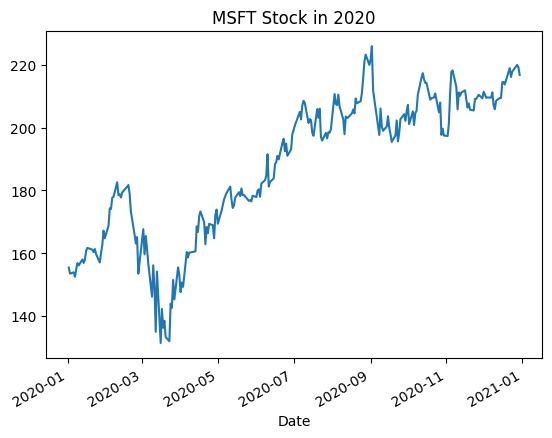

In [5]:
df['Adj Close'].plot(title='MSFT Stock in 2020')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

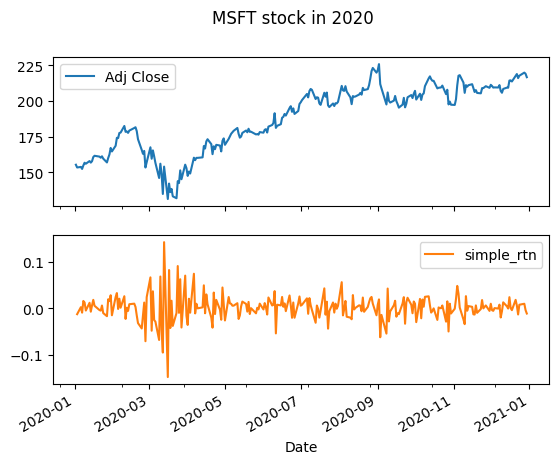

In [6]:
(
df[['Adj Close', 'simple_rtn']]
.plot(subplots=True, sharex=True,
      title='MSFT stock in 2020')
)

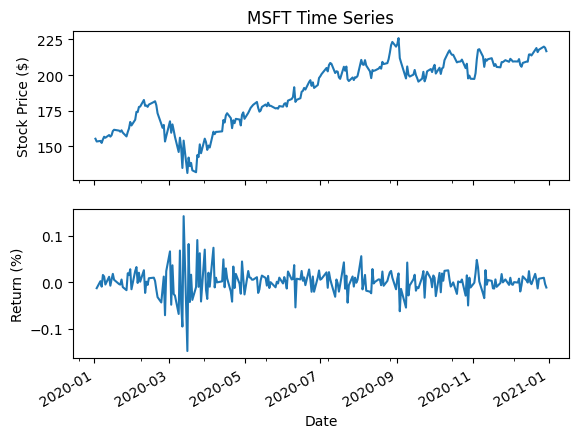

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True)

df['Adj Close'].plot(ax=ax[0])
ax[0].set(title='MSFT Time Series', ylabel='Stock Price ($)')

df['simple_rtn'].plot(ax=ax[1])
ax[1].set(ylabel='Return (%)')

plt.show()

## Interactive Plot

In [ ]:
%pip install pandas-bokeh

In [8]:
import bokeh
import pandas_bokeh

pandas_bokeh.output_notebook()

Loading BokehJS ...

In [9]:
df['Adj Close'].plot_bokeh(kind='line', rangetool=True, title='MSFT Time Series')

Column(id='1099', ...)

## Seasonal Plotting

In [ ]:
%pip install nasdaq-data-link

In [10]:
import nasdaqdatalink
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("NASDAQ_DATA_LINK_API_KEY")

<Axes: title={'center': 'Unemployment rate in years 2014 - 2019'}, xlabel='Date'>

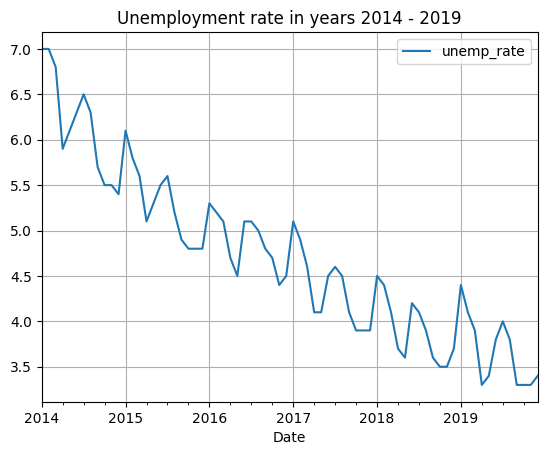

In [11]:
df = (
    nasdaqdatalink.get(dataset='FRED/UNRATENSA',
                       start_date='2014-01-01',
                       end_date='2019-12-31')
    .rename(columns={'Value': 'unemp_rate'})
)

df.plot(title='Unemployment rate in years 2014 - 2019', grid=True)

Seems like there is some kind of pattern here that would be interesting to look at year over year.

In [12]:
df['year'] = df.index.year
df['month'] = df.index.strftime('%b')

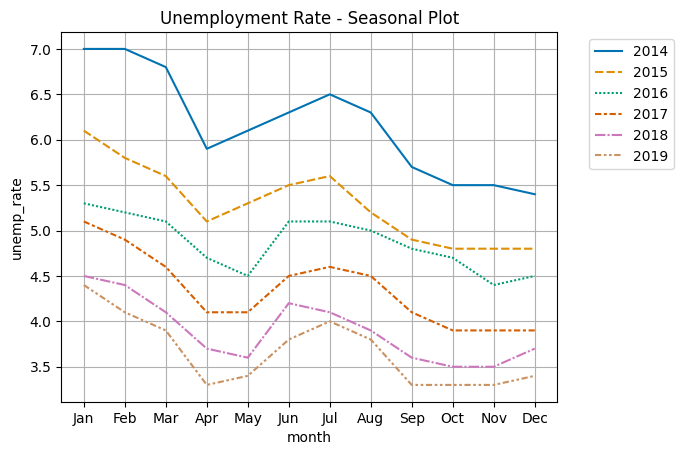

In [13]:
sns.lineplot(data=df,
             x='month',
             y='unemp_rate',
             hue='year',
             style='year',
             legend='full',
             palette='colorblind')

plt.title('Unemployment Rate - Seasonal Plot')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.grid()

### Alternative Version

In [ ]:
%pip install statsmodels plotly

In [ ]:
%pip install nbformat

In [14]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

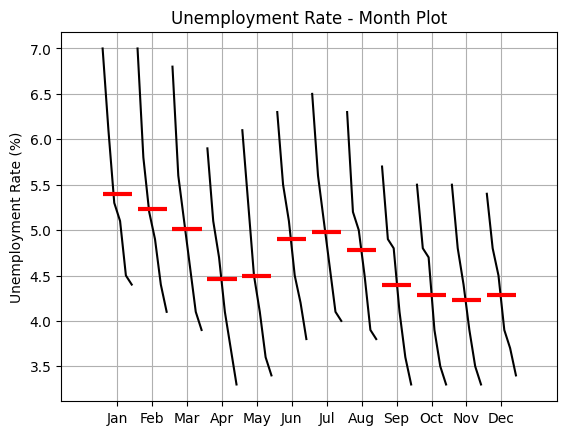

In [15]:
month_plot(df['unemp_rate'], ylabel='Unemployment Rate (%)')
plt.title('Unemployment Rate - Month Plot')
plt.grid()

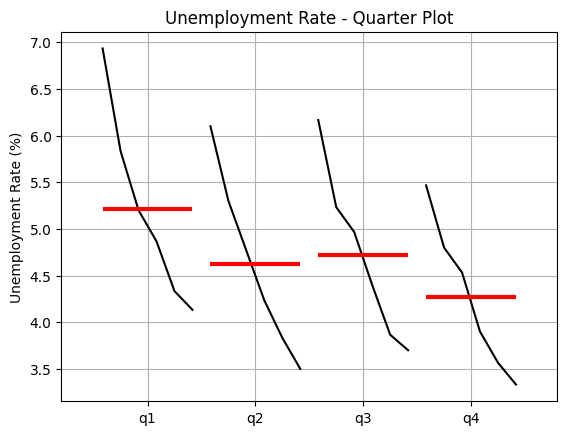

In [16]:
quarter_plot(df['unemp_rate'].resample('Q').mean(),
             ylabel='Unemployment Rate (%)')
plt.title('Unemployment Rate - Quarter Plot')
plt.grid()

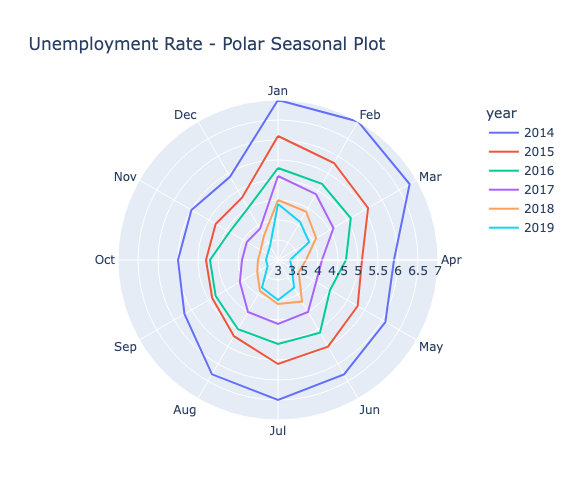

In [17]:
fig = px.line_polar(
    df, r='unemp_rate', theta='month',
    color='year', line_close=True,
    title='Unemployment Rate - Polar Seasonal Plot',
    width=600, height=500,
    range_r=[3,7]
)
fig.show()

## Candlesticks

this is a bit finicky

In [ ]:
%pip install cufflinks

In [22]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go

cf.go_offline()

In [44]:
df = yf.download('TSLA',
                 start='2019-01-01',
                 end='2019-12-31',
                 progress=False,
                 auto_adjust=True)

In [24]:
init_notebook_mode(connected=False)

In [26]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
            requirejs.config({
                paths: {
                    base: './static/base',
                    plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
            });
        </script>
        '''))

In [34]:
qf = cf.QuantFig(
    df, title='Tesla Stock Price',
    legend='top', name='Tesla Stock Price in 2019'
)

In [35]:
qf.add_volume()
qf.add_sma(periods=20, color='red')
qf.add_ema(periods=20, color='green')

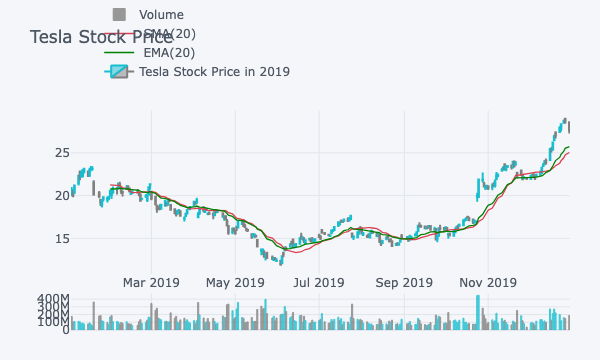

In [36]:
configure_plotly_browser_state()
qf.iplot()

### Alternative

In [ ]:
%pip install mplfinance

In [40]:
import mplfinance as mpf

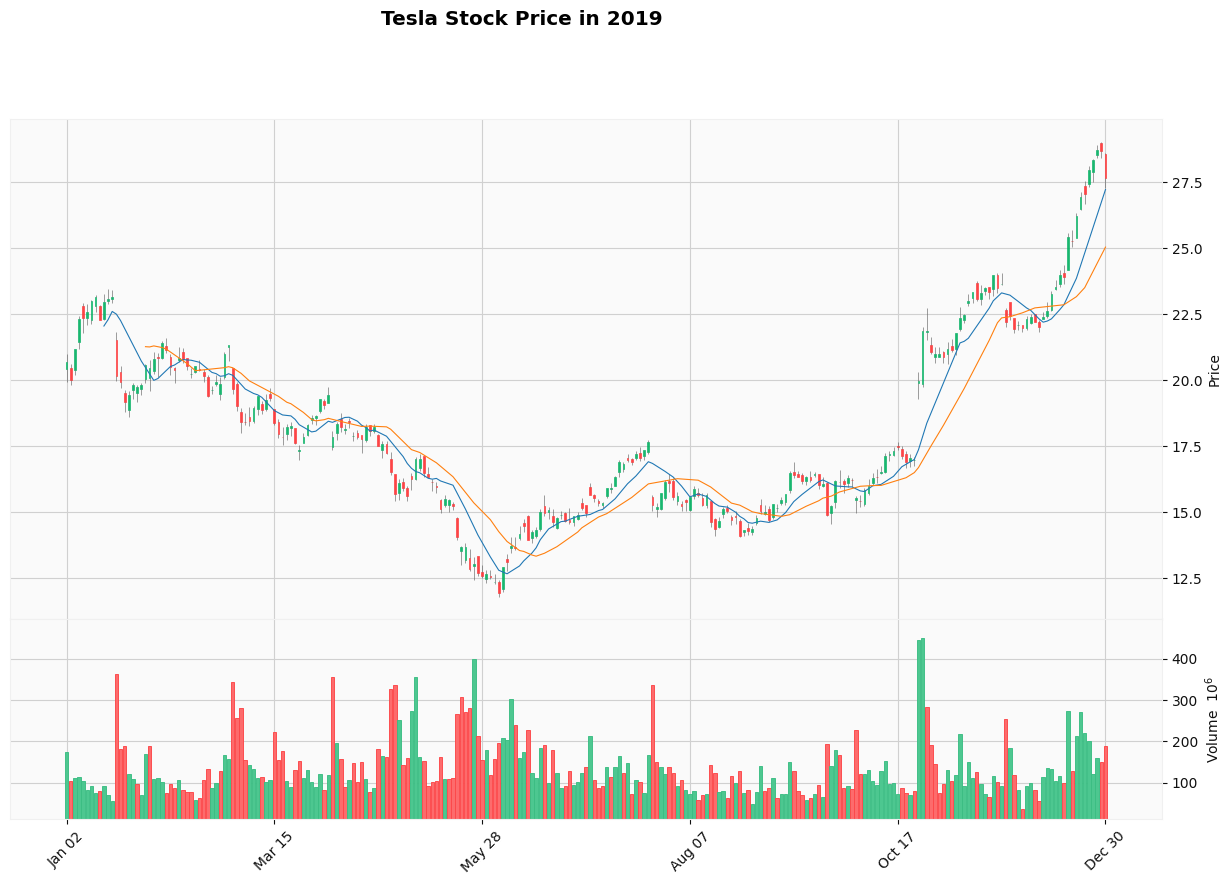

In [45]:
mpf.plot(df, type='candle',
         mav=(10,20),
         volume=True,
         style='yahoo',
         title='Tesla Stock Price in 2019',
         figsize=(16,10))